---
# 6. CNN Model
<span id="Importmodules"></span>

---

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import joblib
import numpy as np

# Load the features and labels for train, validation, and test sets
X_train_features, y_train_labels = joblib.load('train_split.joblib')
X_val, y_val = joblib.load('val_split.joblib')
X_test_features, y_test_labels = joblib.load('test.joblib')

# Print the shape of the features to confirm
print(f"X_train_features shape: {X_train_features.shape}")
print(f"y_train_labels shape: {y_train_labels.shape}")
print(f"X_test_features shape: {X_test_features.shape}")
print(f"y_test_labels shape: {y_test_labels.shape}")

# Define the fully connected model for the extracted features
model = Sequential()

# Input layer (feature vectors of size 1024)
model.add(Dense(1024, activation='relu', input_shape=(X_train_features.shape[1],)))
model.add(Dropout(0.5))  # Dropout to reduce overfitting

# Hidden layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer (number of classes)
model.add(Dense(y_train_labels.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_features, y_train_labels, 
                    epochs=10, batch_size=32, 
                    validation_data=(X_val, y_val))

X_train_features shape: (1810, 1024)
y_train_labels shape: (1810, 36)
X_test_features shape: (252, 1024)
y_test_labels shape: (252, 36)
Epoch 1/10
57/57 [==============================] - 4s 33ms/step - loss: 3.6623 - accuracy: 0.0696 - val_loss: 3.0089 - val_accuracy: 0.2826
Epoch 2/10
57/57 [==============================] - 2s 26ms/step - loss: 2.7858 - accuracy: 0.2000 - val_loss: 1.9588 - val_accuracy: 0.4503
Epoch 3/10
57/57 [==============================] - 1s 25ms/step - loss: 2.0750 - accuracy: 0.3365 - val_loss: 1.3366 - val_accuracy: 0.6556
Epoch 4/10
57/57 [==============================] - 2s 29ms/step - loss: 1.5593 - accuracy: 0.4796 - val_loss: 0.8469 - val_accuracy: 0.7417
Epoch 5/10
57/57 [==============================] - 2s 29ms/step - loss: 1.1882 - accuracy: 0.5702 - val_loss: 0.5804 - val_accuracy: 0.8477
Epoch 6/10
57/57 [==============================] - 2s 28ms/step - loss: 0.9609 - accuracy: 0.6657 - val_loss: 0.4343 - val_accuracy: 0.8653
Epoch 7/10
57/57 [

In [67]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_features, y_test_labels)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

8/8 [==============================] - 0s 6ms/step - loss: 0.1528 - accuracy: 0.9325
Test accuracy: 0.9325
Test loss: 0.1528


---
# 7. Plot training and validation accuracy
<span id="Importmodules"></span>

---

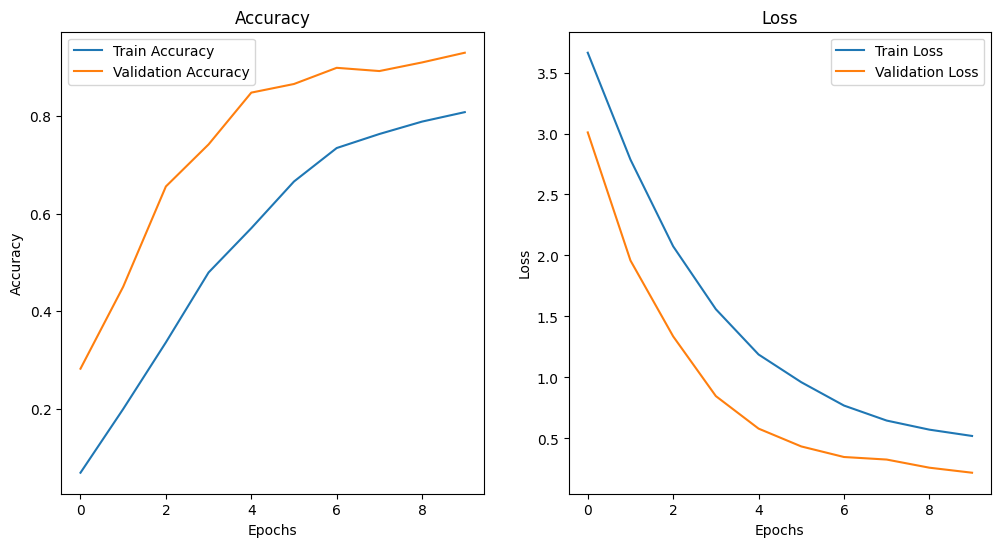

In [68]:
# Plot accuracy and loss
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

---
# 8. Confusion Matrix and Classification Report
<span id="Importmodules"></span>

---

8/8 [==============================] - 0s 6ms/step
Confusion Matrix:
[[2 0 0 ... 0 0 0]
 [0 7 0 ... 0 0 0]
 [0 0 7 ... 0 0 0]
 ...
 [0 0 0 ... 7 0 0]
 [0 0 0 ... 0 7 0]
 [0 0 0 ... 0 0 7]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       0.50      1.00      0.67         7
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         7
          13       1.00      0.

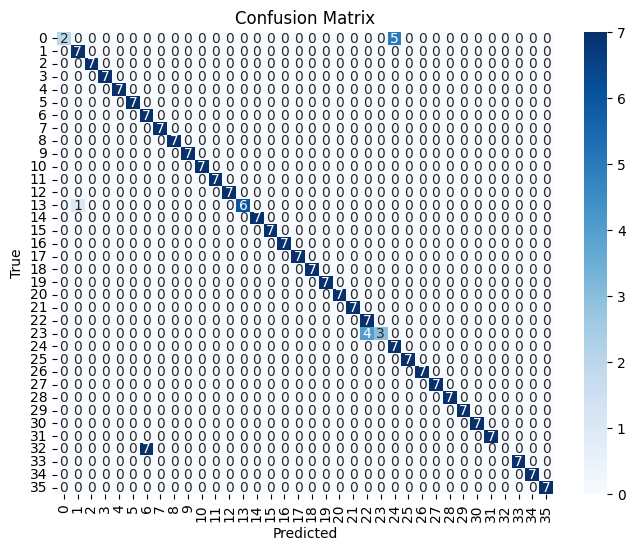

In [69]:
# Make predictions on the test set
y_pred = model.predict(X_test_features)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_labels, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:")
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [74]:
# Extract class names from the training data generator
class_indices = train_data_gen.class_indices  # This gives a dictionary mapping class names to indices
class_names = [key for key, _ in sorted(class_indices.items(), key=lambda item: item[1])]

print("Class Names:", class_names)

Class Names: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [71]:
model.save('cnn_model.h5')

In [72]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('cnn_model.h5')

# Summarize the model to understand its architecture
model.summary()

# Save the model weights separately (optional, for reference)
model.save_weights('model_weights.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_12 (Dropout)        (None, 1024)              0         
                                                                 
 dense_15 (Dense)            (None, 512)               524800    
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 36)               

In [ ]:
import tensorflow as tf
import torch
import torch.nn as nn
import torchvision.models as models
import datetime
import numpy as np

# Step 1: Define the CustomModel with MobileNetV2 base
class CustomModel(nn.Module):
    def __init__(self, num_classes=26):  # 26 classes for A-Z
        super(CustomModel, self).__init__()
        # Use MobileNetV2 features (pre-trained or initialized)
        self.mobilenet = models.mobilenet_v2(pretrained=False).features
        # Global average pooling to reduce 1280 to 1x1x1280
        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))
        # Transition layer to match .h5's 1024 input
        self.transition = nn.Linear(1280, 1024)
        # Dense layers from .h5 (adjusted to 26 classes)
        self.classifier = nn.Sequential(
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(256, num_classes)  # Adjusted to 26 classes (A-Z)
        )

    def forward(self, x):
        x = self.mobilenet(x)
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)  # Flatten to (batch_size, 1280)
        x = self.transition(x)     # Reduce to 1024
        x = self.classifier(x)
        return x

# Step 2: Load .h5 model and extract weights
model_h5 = tf.keras.models.load_model("cnn_model.h5")  # Replace with your .h5 path
weights_dict = {layer.name: layer.get_weights() for layer in model_h5.layers if layer.get_weights()}

# Step 3: Initialize PyTorch model
model_pt = CustomModel(num_classes=26)
model_pt.eval()

# Step 4: Map weights from .h5 to PyTorch model
state_dict = model_pt.state_dict()
with torch.no_grad():
    # Transition layer (1280 -> 1024) - Initialize randomly since not in .h5
    nn.init.xavier_uniform_(model_pt.transition.weight)
    nn.init.zeros_(model_pt.transition.bias)

    # Dense layers (adjust last layer to 26 classes)
    model_pt.classifier[0].weight.copy_(torch.from_numpy(weights_dict['dense_2'][0].T))  # Transpose for FC layers
    model_pt.classifier[0].bias.copy_(torch.from_numpy(weights_dict['dense_2'][1]))
    model_pt.classifier[3].weight.copy_(torch.from_numpy(weights_dict['dense_3'][0].T))
    model_pt.classifier[3].bias.copy_(torch.from_numpy(weights_dict['dense_3'][1]))
    model_pt.classifier[6].weight.copy_(torch.from_numpy(weights_dict['dense_4'][0].T))
    model_pt.classifier[6].bias.copy_(torch.from_numpy(weights_dict['dense_4'][1]))
    # Adjust dense_5 (256 -> 36) to (256 -> 26)
    model_pt.classifier[9].weight.copy_(torch.from_numpy(weights_dict['dense_5'][0][:, :26].T))  # Take first 26 classes (A-Z)
    model_pt.classifier[9].bias.copy_(torch.from_numpy(weights_dict['dense_5'][1][:26]))

# Step 5: Save as Ultralytics checkpoint (matching model.pt format)
checkpoint = {
    'date': datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'version': '1.0',
    'license': 'AGPL-3.0',
    'docs': 'https://docs.ultralytics.com',
    'epoch': -1,
    'best_fitness': 0.0,
    'model': model_pt.state_dict(),
    'ema': None,
    'updates': 0,
    'optimizer': None,
    'train_args': {},
    'train_metrics': {},
    'train_results': {}
}

output_path = "model.pt"
torch.save(checkpoint, output_path)
print(f"Model successfully converted and saved as '{output_path}' in Ultralytics checkpoint format.")

Model successfully converted and saved as 'converted_model.pt' in Ultralytics checkpoint format.
